## Clustering Analysis of Bellabeat Users

### Introduction
This analysis aims to cluster Bellabeat users based on their activity levels using features such as "TotalSteps," "VeryActiveDistance," and "Calories." By identifying distinct groups with similar activity patterns, we can gain valuable insights into their fitness levels and behaviors. The goal is to leverage these insights to develop targeted marketing strategies and personalized exercise recommendations. 

Understanding the fitness levels and activity patterns of users allows Bellabeat to provide tailored information and resources that can enhance user engagement and retention. By clustering users effectively, Bellabeat can offer more specific and relevant support, helping users stay motivated and achieve their fitness goals. This approach not only improves user satisfaction but also strengthens the overall effectiveness of Bellabeat’s fitness tracking solutions, ensuring that users remain active and healthy.

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.express as px
import os


In [2]:
df_daily_activity_merged = pd.read_csv('../data/dailyActivity_merged.csv')

In [3]:
df_daily_activity_merged.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
df_daily_activity_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

Define the subset of variables, that will be used for analysis

In [5]:
subset = df_daily_activity_merged[["TotalSteps", "VeryActiveDistance", "Calories"]]

Scale the data so the clustering algorithm can work properly

In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset)

### Clustering Methodology

We will use the KMeans algorithm for clustering. 

**KMeans Explanation**: 
KMeans is a popular clustering algorithm that partitions a dataset into distinct groups (or clusters) based on similarities in the data. It works by:
1. Selecting a predefined number of clusters (K).
2. Randomly initializing the center of each cluster.
3. Assigning each data point to the nearest cluster center.
4. Updating the cluster centers based on the mean of the data points assigned to each cluster.
5. Repeating the assignment and update steps until the cluster centers stabilize.

This method helps in identifying natural groupings within the data, allowing us to understand and analyze the behavior and characteristics of different user segments.

### Determining Optimal Number of Clusters
To determine the optimal number of clusters, we will perform an elbow analysis. This technique involves plotting the explained variation as a function of the number of clusters and selecting the elbow point, where the rate of decrease sharply slows down. This point represents the ideal number of clusters, balancing between having enough clusters to capture key differences and not having so many that the model becomes too complex.

By using this method, we ensure that the clustering is both efficient and meaningful, providing valuable insights into user activity patterns.

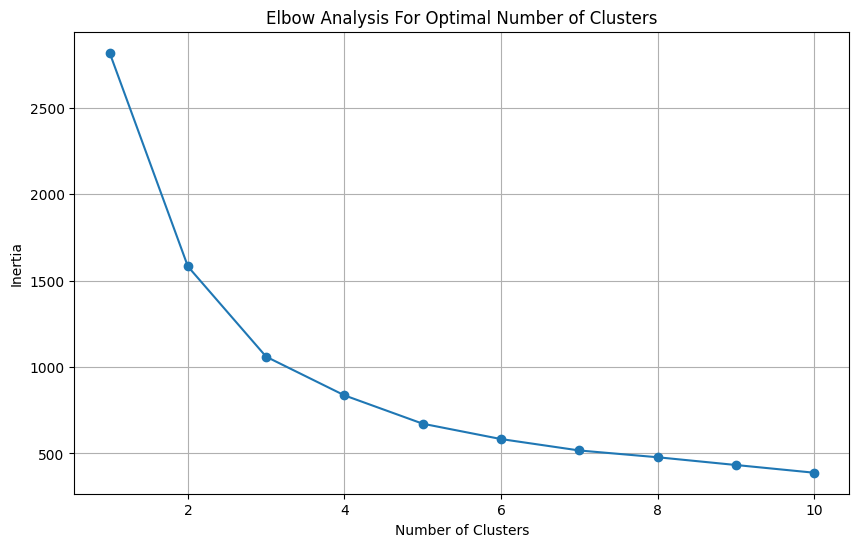

In [7]:
# Set the number of cores explicitly
os.environ['LOKY_MAX_CPU_COUNT'] = '4'

# Define the range of clusters to test
cluster_range = range(1, 11)
inertia_values = []

# Perform K-means clustering for each number of clusters
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values to find the "elbow" point
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Analysis For Optimal Number of Clusters')
plt.grid(True)
plt.show()

#### Findings

The elbow plot indicates that **the optimal number of clusters is 3**. This is where the inertia value starts to decrease more slowly, suggesting that additional clusters beyond this point do not significantly improve the clustering performance. Therefore, using 3 clusters seems to provide the best balance between simplicity and explanatory power.

#### Conclusion

Based on the elbow analysis, 3 clusters were selected as the optimal number for segmenting Bellabeat users based on their activity levels. This clustering will be used to develop targeted marketing strategies and personalized exercise recommendations, aiming to retain users and enhance their fitness levels.

In [8]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

In [9]:
df_daily_activity_merged["ActivityLevel"] = cluster_labels

In [10]:
# Create the 3D scatter plot
fig = px.scatter_3d(
    df_daily_activity_merged,
    x="TotalSteps",
    y="VeryActiveDistance",
    z="Calories",
    color="ActivityLevel",
    title="Clustering Visualization",
    template="plotly_dark",
)

# Update the marker properties
fig.update_traces(
    marker=dict(size=3, opacity=0.6, line=dict(width=2, color="DarkSlateGrey"))
)

# Adjust the layout to make the plot higher and less wide
fig.update_layout(
    scene=dict(
        xaxis_title="TotalSteps",
        yaxis_title="VeryActiveDistance",
        zaxis_title="Calories",
    ),
    scene_aspectmode="cube",
    width=600,  # Adjust width to make it less wide
    height=600,  # Adjust height to make it taller
    margin=dict(l=0, r=0, b=0, t=30),  # Adjust margins if necessary
)

# Show the plot
fig.show()


As observed, the labels assigned by K-Means need to be manually interpreted. In this case, the most active group is labeled as cluster 2, the moderately active group as cluster 0, and the least active group as cluster 1. K-Means assigns labels based on the clustering process, which may not correspond to intuitive or expected labels.

In [11]:
# Group the data by 'ActivityLevel' and calculate the mean for numeric columns
cluster_activity_means = df_daily_activity_merged.groupby('ActivityLevel').mean(numeric_only=True)

# Print the mean values for relevant columns
print(cluster_activity_means[['TotalSteps', 'VeryActiveDistance', 'Calories']])

                 TotalSteps  VeryActiveDistance     Calories
ActivityLevel                                               
0               3391.366265            0.150747  1792.009639
1              16831.607595            8.348861  3488.721519
2               9960.811659            1.547982  2569.730942


In [12]:
# Create a mapping dictionary for cluster labels to activity levels
labels = {0: "Not Very Active", 1: "Highly Active", 2: "Moderately Active"}

# Map cluster labels to activity levels
activity_levels = [labels[label] for label in cluster_labels]

# Add the 'ActivityLevel' column to the original DataFrame
df_daily_activity_merged['ActivityLevel'] = activity_levels

In [13]:
# Group the data by 'ActivityLevel' and calculate the mean for numeric columns
cluster_activity_means = df_daily_activity_merged.groupby('ActivityLevel').mean(numeric_only=True)

# Print the mean values for relevant columns to verify mapping worked as intended
print(cluster_activity_means[['TotalSteps', 'VeryActiveDistance', 'Calories']])

                     TotalSteps  VeryActiveDistance     Calories
ActivityLevel                                                   
Highly Active      16831.607595            8.348861  3488.721519
Moderately Active   9960.811659            1.547982  2569.730942
Not Very Active     3391.366265            0.150747  1792.009639


### Fitness Clustering Analysis

In this initial fitness clustering analysis, the features "TotalSteps," "VeryActiveDistance," and "Calories" were used to evaluate Bellabeat users' general fitness and activity levels. While these features offer valuable insights into physical activity and calorie expenditure, the "Calories" feature may introduce bias into the clustering results.

Calorie consumption is influenced by factors such as metabolic rate, body size, and gender, which can cause users with differing characteristics to be assigned to different clusters. To mitigate this bias and achieve more accurate fitness clustering, additional data would be incorporated in more advanced clustering approaches, including user-specific information like age, weight, and gender. These variables will enable the normalization of calorie data based on individual characteristics, providing a more accurate assessment of fitness levels.

This analysis is ongoing, and the methodology will be refined further. While the limitations of using the "Calories" feature are recognized, it remains significant in capturing overall physical activity and serves as a useful starting point.

In [14]:
import plotly.express as px

# Define the order of the categories
category_order = ["Highly Active", "Moderately Active", "Not Very Active"]

# Create the 3D scatter plot
fig = px.scatter_3d(
    df_daily_activity_merged,
    x="TotalSteps",
    y="VeryActiveDistance",
    z="Calories",
    color="ActivityLevel",
    template="plotly_white",  # Changed to white background
    color_discrete_sequence=["blue", "red", "green"],
    category_orders={"ActivityLevel": category_order}
)

# Remove the white circles around data points
fig.update_traces(marker=dict(size=3, opacity=0.6, line=dict(width=0)))

fig.update_layout(
    scene=dict(
        xaxis_title="TotalSteps",
        yaxis_title="VeryActiveDistance",
        zaxis_title="Calories",
        xaxis=dict(backgroundcolor="white"),
        yaxis=dict(backgroundcolor="white"),
        zaxis=dict(backgroundcolor="white")
    ),
    scene_aspectmode="cube",
    title="Clustering Visualization",
    legend=dict(
        title="Activity Level",
        itemsizing="constant",
    ),
    width=800,
    height=600,
    margin=dict(l=0, r=0, b=0, t=30),
)

# Increase the resolution for PNG download
fig.update_layout(autosize=False, width=900, height=900)

# Show the plot
fig.show()


### Clustering Visualization

The 3D scatter plot visualizes the clustering of Bellabeat users based on their activity levels. The axes represent the following features:
- **X-axis**: TotalSteps
- **Y-axis**: VeryActiveDistance
- **Z-axis**: Calories

Each point in the plot represents a user, colored according to their activity level:
- **Blue**: Highly Active
- **Red**: Moderately Active
- **Green**: Not Very Active

The plot shows a distinct separation between the clusters, indicating different levels of physical activity and calorie expenditure among the users. The most active users tend to have higher values in TotalSteps, VeryActiveDistance, and Calories, while the least active users have lower values in these metrics.

### Data Grouping and Averaging

Please note that the data points in this dataset are not grouped by individual users, meaning the same user may appear multiple times on different days. For the final clustering implementation, e.g. the average activity of each user will be used to represent them. However, the approach used here should be considered a prototype and is meant to mitigate limitations of the rather small dataset.